In [200]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC

In [201]:
# Load the dataset
data = pd.read_csv("marketing_campaign.csv")

# Exploring dataset
print(data.shape)
print(data.dtypes)

(2240, 29)
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [202]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [203]:
# Get the summary statistics for all the columns
round(data.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0


In [204]:
# Check for missing values in the dataset
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

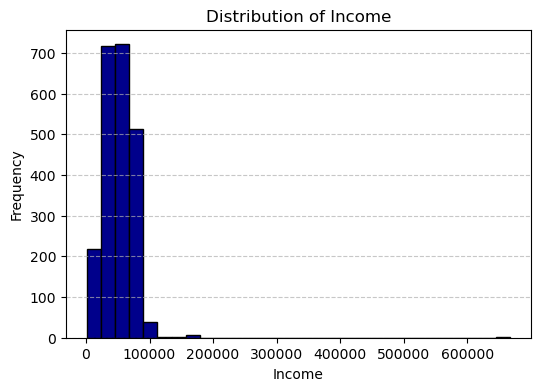

In [205]:
# Check if the variable follows a normal distribution so we can impute the missing values with the mean 
plt.figure(figsize=(6, 4))
plt.hist(data['Income'], bins=30, color='darkblue', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

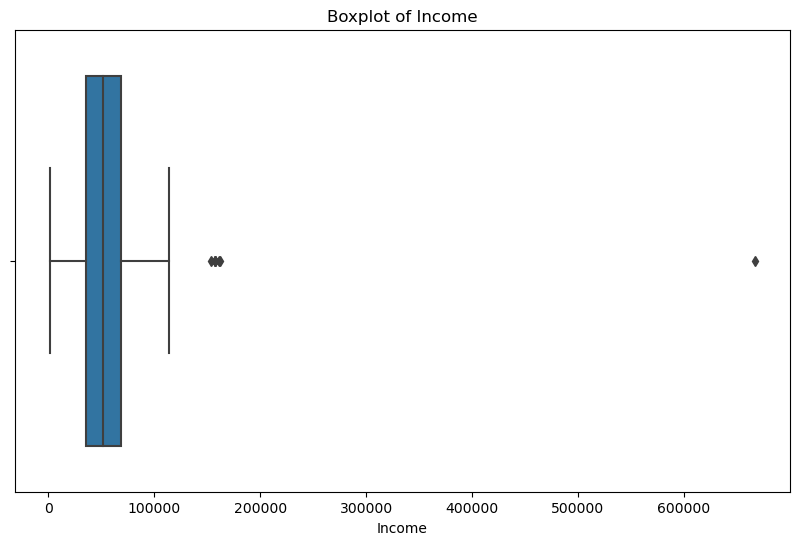

In [206]:
# Create a boxplot for the 'Income' variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', data=data)
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()

In [207]:
# Handling missing values by removing the NA values in income column
# We are removing the NA values because the distribution of income is not normal to replace it with a mean or median value
data = data.dropna(subset=['Income'])

In [208]:
# Verify there are no NA values
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [209]:
# Modifying the marital status to reduced categories
data['Marital_Status'] = data['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Single': 'Alone', 
                                                         'Divorced': 'Alone', 'Widow': 'Alone', 'Absurd': 'Alone',
                                                         'YOLO': 'Alone'})

In [210]:
# Modifying the Education to reduced categories
data['Education'] = data['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate",
                                               "Master":"Graduate", "PhD":"Postgraduate"})

In [211]:
# Apply one-hot encoding on categorical columns 'Education' and 'Marital_Status'
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

In [212]:
# Calculate the customer age
data['Age'] = 2023 - data['Year_Birth'] 

In [213]:
# Convert 'Dt_Customer' column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Calculate the time difference between 'Dt_Customer' and the current date
current_date = pd.datetime.now()
data['Enrollment_Duration'] = current_date - data['Dt_Customer']

# Convert the timedelta to days or another time unit as needed
data['Enrollment_Duration_Days'] = data['Enrollment_Duration'].dt.days

C:\Users\fathima.sa\AppData\Local\Temp\ipykernel_17568\1529934879.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  current_date = pd.datetime.now()


In [214]:
# Creating a new column to get a combined spend on food or groceries
# Specify the columns to be combined
food_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

# Create a new column 'MntFood' by summing the specified columns
data['MntFood'] = data[food_columns].sum(axis=1)

# Optionally, drop the original columns if needed
data = data.drop(columns=food_columns)

In [215]:
# Combining the columns of kids and teenagers at home
# Specify the columns to be combined
children_columns = ['Kidhome', 'Teenhome']

# Create a new column 'MntFood' by summing the specified columns
data['TotChildren'] = data[children_columns].sum(axis=1)

# Optionally, drop the original columns if needed
data = data.drop(columns=children_columns)

In [216]:
# Remove all the columns we do not need for our analysis
columns_to_drop = ['Dt_Customer', 'Enrollment_Duration', 'Year_Birth', 
                   'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1',
                   'AcceptedCmp2','Z_CostContact','Z_Revenue', 'ID']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

In [217]:
data.dtypes

Income                      float64
Recency                       int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
Complain                      int64
Response                      int64
Education_Graduate            uint8
Education_Postgraduate        uint8
Education_Undergraduate       uint8
Marital_Status_Alone          uint8
Marital_Status_Partner        uint8
Age                           int64
Enrollment_Duration_Days      int64
MntFood                       int64
TotChildren                   int64
dtype: object

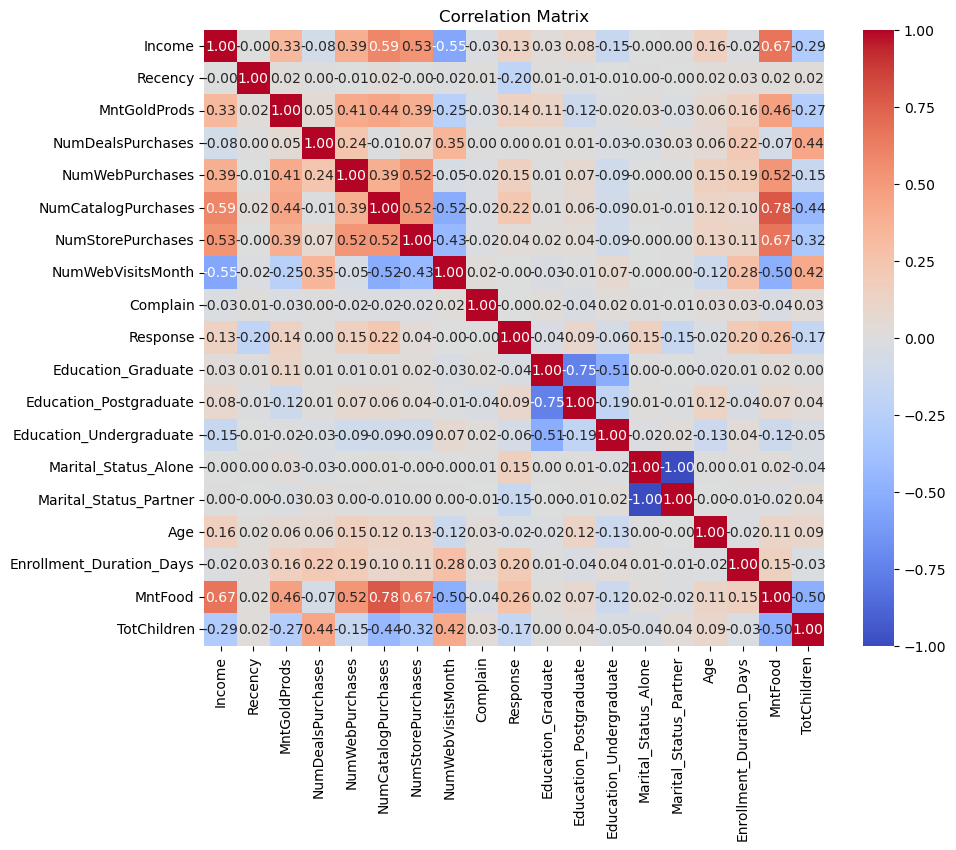

In [218]:
# Plotting the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

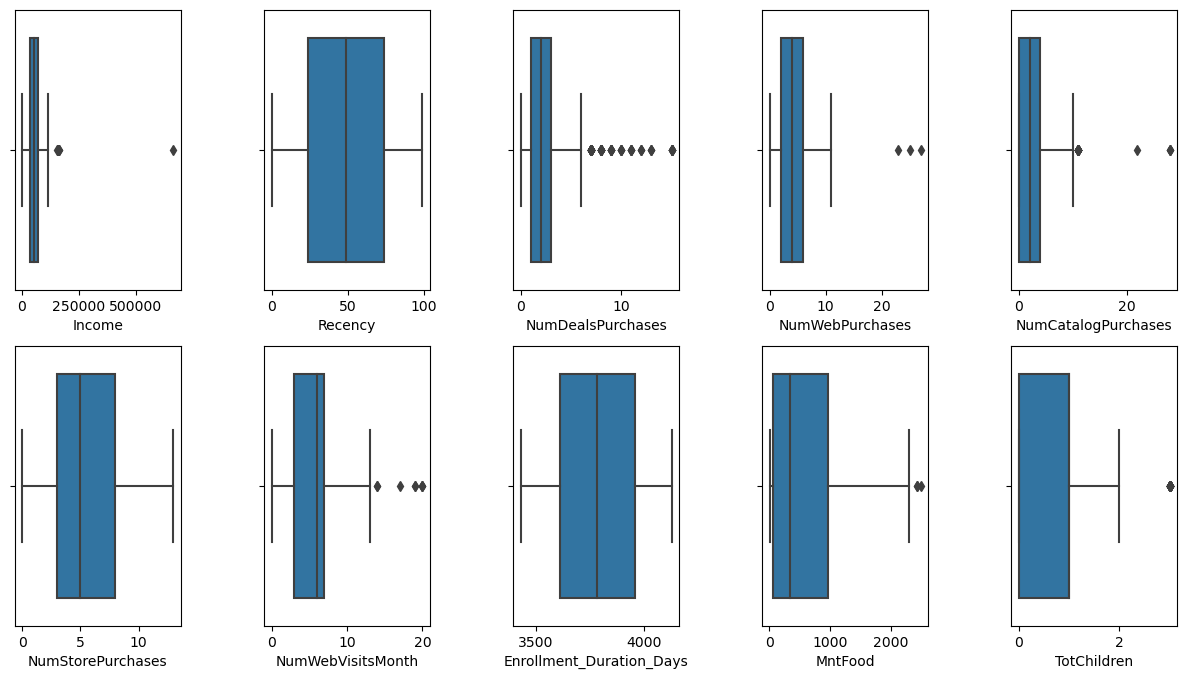

In [219]:
# Specify the columns for boxplots
boxplot_columns = ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'Enrollment_Duration_Days', 'MntFood', 'TotChildren']

# Create subplots for boxplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
fig.subplots_adjust(wspace=0.5)

# Plot boxplots for specified columns
for i, col in enumerate(boxplot_columns):
    sns.boxplot(x=data[col], ax=axes[i//5, i%5])

plt.show()

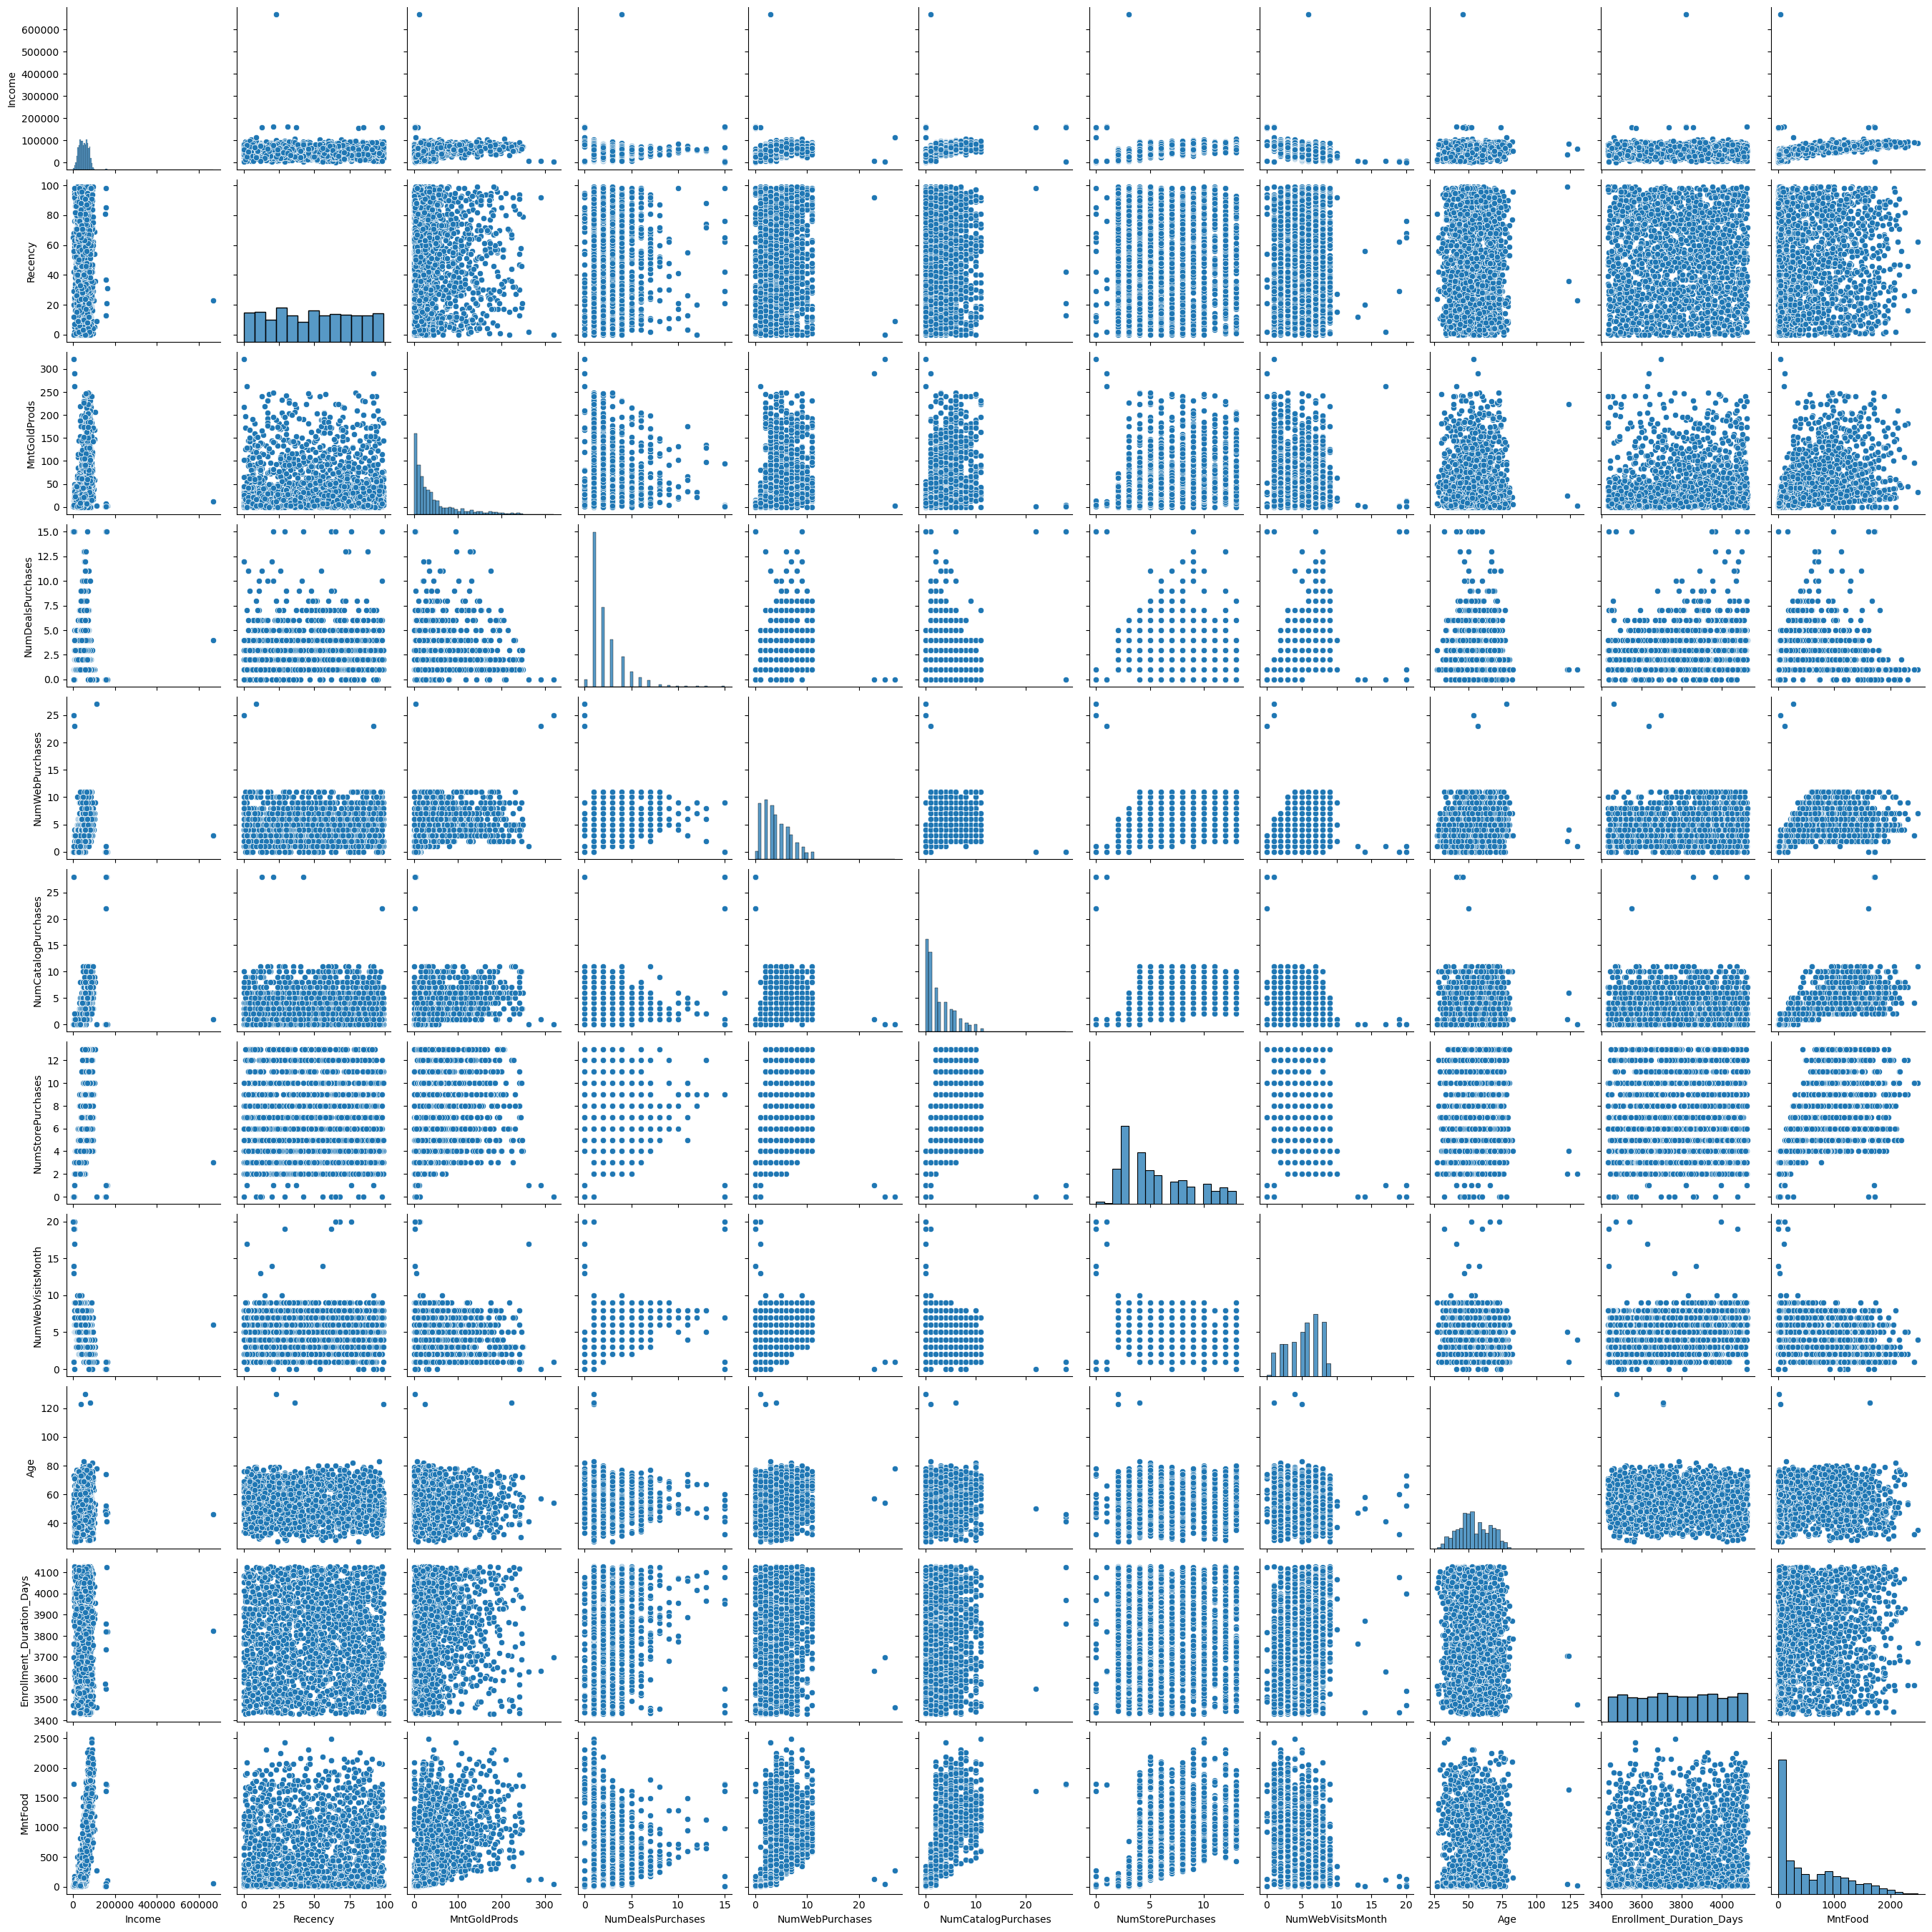

In [220]:
# Study the relationship between the variables in the dataset
# Pair plot for numerical features
sns.pairplot(data.drop(columns=['Marital_Status_Alone', 'Marital_Status_Partner', 'Education_Undergraduate', 
                                'Education_Graduate', 'Education_Postgraduate', 'Complain', 'Response', 'TotChildren']))
plt.show()

In [221]:
# Split the data into training and testing sets
X = data.drop('Response', axis=1)
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
data.dtypes

Income                      float64
Recency                       int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
Complain                      int64
Response                      int64
Education_Graduate            uint8
Education_Postgraduate        uint8
Education_Undergraduate       uint8
Marital_Status_Alone          uint8
Marital_Status_Partner        uint8
Age                           int64
Enrollment_Duration_Days      int64
MntFood                       int64
TotChildren                   int64
dtype: object

In [223]:
# Part 2

In [225]:
# Initialize and train the logistic regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

C:\Users\fathima.sa\AppData\Local\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [226]:
# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

In [227]:
# Evaluate the model
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Metrics:
Accuracy: 0.8671171171171171
Precision: 0.5789473684210527
Recall: 0.1774193548387097
Confusion Matrix:
 [[374   8]
 [ 51  11]]


In [228]:
# Get feature importance
ImpVar_log = pd.DataFrame({'Feature': X.columns, 'Importance': log_model.coef_[0]})
ImpVar_log = ImpVar_log.sort_values(by='Importance', ascending=False)
print("\nLogistic Regression Feature Importance:")
print(ImpVar_log)


Logistic Regression Feature Importance:
                     Feature  Importance
7          NumWebVisitsMonth    0.006144
5        NumCatalogPurchases    0.005628
4            NumWebPurchases    0.003538
12      Marital_Status_Alone    0.002385
2               MntGoldProds    0.002061
16                   MntFood    0.001750
10    Education_Postgraduate    0.001267
3          NumDealsPurchases    0.001118
15  Enrollment_Duration_Days    0.000080
8                   Complain    0.000068
0                     Income   -0.000018
11   Education_Undergraduate   -0.000248
17               TotChildren   -0.001068
9         Education_Graduate   -0.001352
13    Marital_Status_Partner   -0.002718
6          NumStorePurchases   -0.013063
1                    Recency   -0.023810
14                       Age   -0.023866


In [229]:
# Part 3

In [230]:
# Initialize and train the Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [231]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

In [232]:
# Evaluate the model
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Metrics:
Accuracy: 0.8603603603603603
Precision: 0.0
Recall: 0.0
Confusion Matrix:
 [[382   0]
 [ 62   0]]


C:\Users\fathima.sa\AppData\Local\anaconda3new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [233]:
# Part 4

In [234]:
# Compare model performance
print("\nComparison of Model Performance:")
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))

# Compare significant variables from logistic regression
print("\nLogistic Regression Feature Importance:")
print(ImpVar_log)



Comparison of Model Performance:
Logistic Regression Metrics:
Accuracy: 0.8671171171171171
Precision: 0.5789473684210527
Recall: 0.1774193548387097

SVM Metrics:
Accuracy: 0.8603603603603603
Precision: 0.0
Recall: 0.0

Logistic Regression Feature Importance:
                     Feature  Importance
7          NumWebVisitsMonth    0.006144
5        NumCatalogPurchases    0.005628
4            NumWebPurchases    0.003538
12      Marital_Status_Alone    0.002385
2               MntGoldProds    0.002061
16                   MntFood    0.001750
10    Education_Postgraduate    0.001267
3          NumDealsPurchases    0.001118
15  Enrollment_Duration_Days    0.000080
8                   Complain    0.000068
0                     Income   -0.000018
11   Education_Undergraduate   -0.000248
17               TotChildren   -0.001068
9         Education_Graduate   -0.001352
13    Marital_Status_Partner   -0.002718
6          NumStorePurchases   -0.013063
1                    Recency   -0.023810
14

C:\Users\fathima.sa\AppData\Local\anaconda3new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
